In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

Detroit Mayor Mike Duggan made national news in March 2021 when he turned down a shipment of over 6,000 Johnson & Johnson vaccine doses stating that the citiziens of his city should "get the best". The mayor was refering to the efficacy rate of the vaccine, which was reported to be about 66%. In comparison, Moderna and Pfizer both reported efficacy rates of about 95% for their vaccines. 

Duggan's reasoning seems valid, but the scope of the three clinical trials are not comparable, meaning  
direct comparisons of the experiments is problematic. Moreover, the Centers for Disease Control (CDC) considers a 66% efficicay rate quite good.

We consider each of these points in turn, beginning with scope and then efficacy.

## Scope

Recall that when we evaluate the scope of the data, we consider who, when, and where the study took place. For the Johnson & Johnson clinical trial, participants: 

+ included adults 18 and over, wher roughly 40% had conditions, called comorbidities, associated with an increased risk for getting severe COVID-19
+ enrolled in the study from October to November, 2020
+ were from 8 countries across 3 continents, including the US and South Africa

The participants in the Moderna and Pfizer trials were primarily from the US, roughly 40% had comorbidities for severe COVID-19, and the trial took place earlier, over summer 2021. 
The timing and location of the trials make them difficult to compare.
Cases of COVID-19 were at a low point in the summer in the US, but they shot up in the late fall.
Also, a variant of the virus that is more contagious was spreading rapidly in South Africa at the time of the J&J trial. 

Clinical trials are designed to test vaccine under similar circumstances. This is accomplished through the 
randomized assignment of subjects to treatment and control groups. While the scope from one trial to the next are 
quite different, the randomization keeps the scope of the treatment and control groups roughly the same, which enables meaningful comparisons between groups. 

The scope was different enough across the three vaccine trials to make direct comparisons problematic. 
Next, we consider what the vaccine's efficacy rate means.

## Design

Johnson & Johnson enrolled 43,738 people in their trial.
These participants were split into two groups at random.
Half received the new vaccine, and the other half received a placebo, such as a saline solution.
Then, everyone was followed for 28 days to see whether they contracted COVID-19.

A lot of information was recorded on each patient, such as their age, race and sex, and in addition
whether they caught COVID, including the severity of the disease. At the end of 28 days, they found 468 cases of COVID-19, 117 of these were in the treatment group, and 351 in the control group.


The random assignment to treatment and control, gives the scientists a framework to assess the effectiveness of the vaccine. 
The typical reasoning goes as follows:

+ Begin with the assumption that the vaccine is ineffective
+ So the 468 who caught COVID-19 would have caught it whether or not they received the vaccine
+ And, the remaining 43,270 people in the trial who did not get sick would have remained healthy whether or not they received the vaccine.
+ The split of 117 sick people in treatment and 351 in control was just do to the chance process in assigning participants to treatment or control.

We can set up an urn model to reflect this position.

### The Urn Model

Our urn has 43,738 marbles, one for each person in the clinical trial.
Since there were 468 cases among them,
we label 468 marbles with a 1 and the remaining 43,270 with 0. 
We draw half the marbles (21,869) from the urn to receive the treatment, and
the half remaining in the urn receive the placebo. 

The results of the experiment are simply the count of the number of marbles marked 1 that were randomly drawn from the urn. 

We can simulate this process to get a sense of how likely it would be under these assumptios to draw only 117 marbles marked 1 from the urn. Since we draw half of the marbles from the urn, we would expect about half of the 468, or 234, to be drawn. The simulation study gives us a sense of the variation that might result from the random assignment process. That is, we can approximate the chance that there would be 117 or fewer cases of the virus in the treatment group. This calculation is based on the above assumptions, namely that the vaccine has no impact.

### Simulation study

We saw earlier that we can generate random outcomes according to the hypergeometric probability distribution, rather than having to program the urn sampling from scratch.   

In [2]:
simulations_fast = np.random.hypergeometric(ngood=468, nbad=43270, nsample=21869, size=500000)

In [3]:
np.mean(simulations_fast)

233.989052

Text(0.5, 0, 'Count of Cases in the Treatment Group')

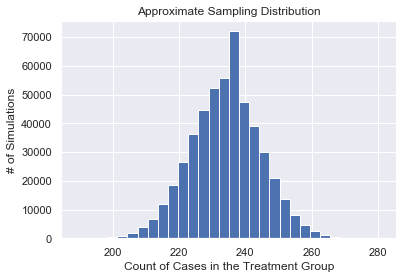

In [4]:

plt.hist(simulations_fast, bins=30)
#plt.axvline(0.57, color='red', linestyle='dashed', linewidth=2)
plt.title('Approximate Sampling Distribution')
plt.ylabel('# of Simulations')
plt.xlabel('Count of Cases in the Treatment Group')

In our simulation, we repeated the process of random assignment to the treatment group 500,000 times.
Indeed, we found that on average there were 234 cases of disease in the treatment group.
The histogram of outcomes shows that not one of the 500,000 simulations had as few as 117 cases or fewer.
It would be an extremely rare event to see so few cases of COVID-19, if in fact the vaccine was not effective. 

In [5]:
np.std(simulations_fast)

10.724159833818963

### Vaccine Efficacy

Vaccine Efficacy (VE) is measured by comparing the risk of disease among vaccinated and unvaccinated persons: 
$$ \frac{\textrm{Risk among unvaccinated group} − \textrm{Risk among vaccinated group}}
 {\textrm{Risk among unvaccinated group}},$$ 
where, e.g., the risk among unvaccinated is the proportion of unvaccinated who contracted COVID. 

Since the two groups had the same number in each, we can compute the efficacy as:

In [6]:
(351 - 117) / 351

0.6666666666666666

The Centers for Disease Control sets a standard for VE of 50% when deciding whether to adopt a new vaccine. This would be equivalent to how many cases in the treatment group?

In [7]:
468/3

156.0

We can see from the histogram that none of the simulations yielded as few or fewer than 156 cases in the treatment group. Furthermore, when it cam to preventing severe cases of Covid, the J&J vaccine was over 80% effective, and no deaths were observed in the treatment group. 

The Johnson & Johnson vaccine received emergency approval in spring 2021, and expects to receive full approval by the FDA in fall 2021. 
Additionally, none of the patients receiving the vaccine in any of the trials had sever enough COVID to be hospitalized. 
The Mayor of Detroit retracted his original statement, saying 
“I have full confidence that the Johnson & Johnson vaccine is both safe and effective.” 

## References

Johnson & Johnson (Feb. 2021) COVID-19 Vaccine Authorized by U.S. FDA For Emergency Use - First Single-Shot Vaccine in Fight Against Global Pandemic https://www.jnj.com/johnson-johnson-covid-19-vaccine-authorized-by-u-s-fda-for-emergency-usefirst-single-shot-vaccine-in-fight-against-global-pandemic

U. Irfan (Mar. 2021) Why comparing Covid-19 vaccine efficay numbers can be misleading https://www.vox.com/22311625/covid-19-vaccine-efficacy-johnson-moderna-pfizer

